<a href="https://colab.research.google.com/github/JohanSantanaGalvanJob/NaiveBayesPenguins/blob/main/Penguin_NaiveBayes_AllNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Johan Santana Galvan

In [57]:
# importación de datos
import seaborn as sns
penguins = sns.load_dataset('penguins')

# Mapea las columnas "island" y "sex"
mappingIsland = {'Torgersen': 0, 'Biscoe': 1, 'Dream': 2}
mappingSex = {'Male': 0, 'Female': 1}
penguins['island'] = penguins['island'].map(mappingIsland)
penguins['sex'] = penguins['sex'].map(mappingSex)

# Llena los NaN en todo el DataFrame con ceros
penguins = penguins.fillna(0)

# Si aún quedan NaN en la columna "sex", llénalos específicamente con cero
penguins['sex'] = penguins['sex'].fillna(2)
penguins


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,0,39.1,18.7,181.0,3750.0,0.0
1,Adelie,0,39.5,17.4,186.0,3800.0,1.0
2,Adelie,0,40.3,18.0,195.0,3250.0,1.0
3,Adelie,0,0.0,0.0,0.0,0.0,0.0
4,Adelie,0,36.7,19.3,193.0,3450.0,1.0
...,...,...,...,...,...,...,...
339,Gentoo,1,0.0,0.0,0.0,0.0,0.0
340,Gentoo,1,46.8,14.3,215.0,4850.0,1.0
341,Gentoo,1,50.4,15.7,222.0,5750.0,0.0
342,Gentoo,1,45.2,14.8,212.0,5200.0,1.0


In [102]:
# separamos datos de entrada y salida
X_penguins = penguins.drop('species', axis=1)
y_penguins = penguins['species']

# separamos train y test
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_penguins, y_penguins, test_size=0.21, random_state=1)

In [103]:
# 1. elegimos clasificador
from sklearn.naive_bayes import CategoricalNB
# 2. instanciamos el modelo
model = CategoricalNB()
# 3. Entrenamiento con los datos
model.fit(Xtrain, ytrain)
print(Xtest.shape)

(73, 6)


In [104]:
# 4. Predicción con nuevos datos
y_model = model.predict(Xtest)
y_model

array(['Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Chinstrap', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Adelie',
       'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Chinstrap'], dtype='<U9')

In [92]:
# 5 evaluación
# Compara si los resultados obtenidos por el modelo (y_model) coinciden con los datos y_test esperados
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model) # Precisión del modelo


0.958904109589041

In [93]:
# Y finalmente visualizamos la Matriz de Confusión, para lo que se crea la siguiente función, que se llamará más adelante

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt

# y_true : dataframe -> Los valores de las clases que son ciertos (test)
# y_pred : ndarray   -> Los valores calculados de las clases después de realizar la predicción
# class  : ndarray   -> Los nombres de las clases/valores objetivos

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          titleSup=None):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    fig.suptitle(titleSup, fontsize=16, y=1, ha='center')
    return ax

In [95]:
# Transformamos variables categóricas a valores numéricos/enteros para llamar a la función que pinta la matriz de confusión plot_confusion_matrix()
ytest_df= ytest.to_frame()
ytest_df['species'].replace(['Gentoo', 'Adelie', 'Chinstrap'],[0, 1, 2], inplace=True)
ytest_df

,species
306,0
341,0
291,0
102,1
289,0
...,...
93,1
150,1
105,1
112,1


In [96]:
# Transformamos variables categóricas a array para poder llamar a la función que pinta la matriz de confusión plot_confusion_matrix()
import pandas as pd
# Transformamos el resultado de la predicción(array) a un dataframe para transformar los valores categóricos en numéricos
y_model_df= pd.DataFrame(y_model, columns = ['species'])
y_model_df['species'].replace(['Gentoo', 'Adelie', 'Chinstrap'],[0, 1, 2], inplace=True)
# Y volvemos a transformar el dataframe a un array, que es el tipo de dato que espera la función plot_confusion_matrix()
y_model_array = y_model_df['species'].to_numpy()
y_model_array

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 2, 0, 0, 2, 1, 1, 1, 0, 1, 1, 0, 2,
       0, 0, 1, 1, 2, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 2, 0, 2, 2, 1, 1, 0, 2, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 2, 1, 1, 1, 1, 2])

Confusion matrix, without normalization
[[24  0  0]
 [ 1 36  0]
 [ 0  2 10]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

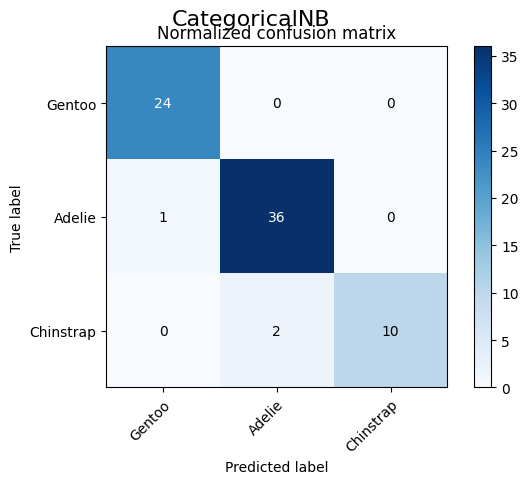

In [98]:
import numpy as np
# Creamos este array porque es el parámetro con las clases que espera la función
clases_penguins = np.array(['Gentoo', 'Adelie', 'Chinstrap'])
plot_confusion_matrix(ytest_df['species'], y_model_array, classes=clases_penguins, normalize=False, title='Normalized confusion matrix', titleSup='CategoricalNB')

In [105]:
# separamos datos de entrada y salida
X_penguins = penguins.drop('species', axis=1)
y_penguins = penguins['species']
# separamos train y test
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_penguins, y_penguins, test_size=0.21, random_state=1)

In [106]:
# 1. elegimos clasificador
from sklearn.naive_bayes import GaussianNB
# 2. instanciamos el modelo
model = GaussianNB()
# 3. Entrenamiento con los datos
model.fit(Xtrain, ytrain)

GaussianNB()

In [107]:
# 4. Predicción con nuevos datos
y_model = model.predict(Xtest)
y_model

array(['Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Chinstrap', 'Gentoo', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Chinstrap', 'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo',
       'Chinstrap', 'Adelie', 'Chinstrap', 'Chinstrap', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Chinstrap', 'Chinstrap',
       'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo',
       'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Chinstrap'], dtype='<U9')

In [108]:
# 5 evaluación
# Compara si los resultados obtenidos por el modelo (y_model) coinciden con los datos y_test esperados
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model) # Precisión del modelo


0.9178082191780822

In [109]:
# Y finalmente visualizamos la Matriz de Confusión, para lo que se crea la siguiente función, que se llamará más adelante

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt

# y_true : dataframe -> Los valores de las clases que son ciertos (test)
# y_pred : ndarray   -> Los valores calculados de las clases después de realizar la predicción
# class  : ndarray   -> Los nombres de las clases/valores objetivos

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          titleSup=None):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    fig.suptitle(titleSup, fontsize=16, y=1, ha='center')
    return ax

In [ ]:
# Transformamos variables categóricas a valores numéricos/enteros para llamar a la función que pinta la matriz de confusión plot_confusion_matrix()
ytest_df= ytest.to_frame()
ytest_df['species'].replace(['Gentoo', 'Adelie', 'Chinstrap'],[0, 1, 2], inplace=True)
ytest_df

In [111]:
# Transformamos variables categóricas a array para poder llamar a la función que pinta la matriz de confusión plot_confusion_matrix()
import pandas as pd
# Transformamos el resultado de la predicción(array) a un dataframe para transformar los valores categóricos en numéricos
y_model_df= pd.DataFrame(y_model, columns = ['species'])
y_model_df['species'].replace(['Gentoo', 'Adelie', 'Chinstrap'],[0, 1, 2], inplace=True)
# Y volvemos a transformar el dataframe a un array, que es el tipo de dato que espera la función plot_confusion_matrix()
y_model_array = y_model_df['species'].to_numpy()
y_model_array

array([0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 2, 0, 0, 2, 2, 1, 1, 0, 1, 2, 0, 2,
       0, 0, 2, 1, 2, 2, 0, 1, 1, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 2, 0, 2, 2, 1, 1, 0, 2, 0, 1, 1, 1, 0, 1, 0, 0, 2, 1,
       1, 2, 1, 1, 1, 1, 2])

Confusion matrix, without normalization
[[24  0  0]
 [ 1 31  5]
 [ 0  0 12]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

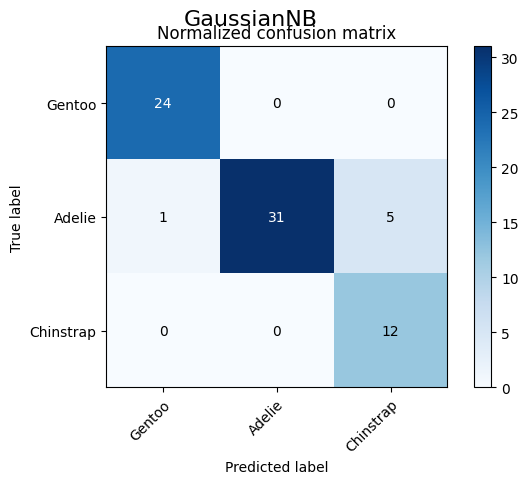

In [112]:
import numpy as np
# Creamos este array porque es el parámetro con las clases que espera la función
clases_penguins = np.array(['Gentoo', 'Adelie', 'Chinstrap'])
plot_confusion_matrix(ytest_df['species'], y_model_array, classes=clases_penguins, normalize=False, title='Normalized confusion matrix', titleSup='GaussianNB')

In [113]:
# separamos datos de entrada y salida
X_penguins = penguins.drop('species', axis=1)
y_penguins = penguins['species']
# separamos train y test
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_penguins, y_penguins, test_size=0.21, random_state=1)

In [114]:
# 1. elegimos clasificador
from sklearn.naive_bayes import MultinomialNB
# 2. instanciamos el modelo
model = MultinomialNB()
# 3. Entrenamiento con los datos
model.fit(Xtrain, ytrain)

MultinomialNB()

In [ ]:
# 4. Predicción con nuevos datos
y_model = model.predict(Xtest)
y_model

In [116]:
# 5 evaluación
# Compara si los resultados obtenidos por el modelo (y_model) coinciden con los datos y_test esperados
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model) # Precisión del modelo

0.8356164383561644

In [117]:
# Y finalmente visualizamos la Matriz de Confusión, para lo que se crea la siguiente función, que se llamará más adelante

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt

# y_true : dataframe -> Los valores de las clases que son ciertos (test)
# y_pred : ndarray   -> Los valores calculados de las clases después de realizar la predicción
# class  : ndarray   -> Los nombres de las clases/valores objetivos

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          titleSup=None):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    fig.suptitle(titleSup, fontsize=16, y=1, ha='center')
    return ax

In [ ]:
# Transformamos variables categóricas a valores numéricos/enteros para llamar a la función que pinta la matriz de confusión plot_confusion_matrix()
ytest_df= ytest.to_frame()
ytest_df['species'].replace(['Gentoo', 'Adelie', 'Chinstrap'],[0, 1, 2], inplace=True)
ytest_df

In [119]:
# Transformamos variables categóricas a array para poder llamar a la función que pinta la matriz de confusión plot_confusion_matrix()
import pandas as pd
# Transformamos el resultado de la predicción(array) a un dataframe para transformar los valores categóricos en numéricos
y_model_df= pd.DataFrame(y_model, columns = ['species'])
y_model_df['species'].replace(['Gentoo', 'Adelie', 'Chinstrap'],[0, 1, 2], inplace=True)
# Y volvemos a transformar el dataframe a un array, que es el tipo de dato que espera la función plot_confusion_matrix()
y_model_array = y_model_df['species'].to_numpy()
y_model_array

array([0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 1, 1, 1, 0, 1, 1, 0, 2,
       0, 0, 1, 1, 2, 2, 0, 1, 1, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 2, 0, 1, 1, 0, 2, 0, 1, 1, 1, 0, 2, 0, 0, 1, 1,
       2, 2, 0, 1, 1, 2, 1])

Confusion matrix, without normalization
[[23  1  0]
 [ 4 29  4]
 [ 1  2  9]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

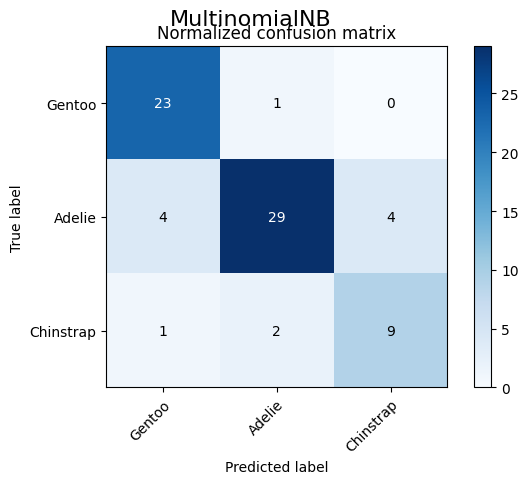

In [120]:
import numpy as np
# Creamos este array porque es el parámetro con las clases que espera la función
clases_penguins = np.array(['Gentoo', 'Adelie', 'Chinstrap'])
plot_confusion_matrix(ytest_df['species'], y_model_array, classes=clases_penguins, normalize=False, title='Normalized confusion matrix', titleSup='MultinomialNB')

In [121]:
# separamos datos de entrada y salida
X_penguins = penguins.drop('species', axis=1)
y_penguins = penguins['species']
# separamos train y test
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_penguins, y_penguins, test_size=0.21, random_state=1)

In [122]:
# 1. elegimos clasificador
from sklearn.naive_bayes import ComplementNB
# 2. instanciamos el modelo
model = ComplementNB()
# 3. Entrenamiento con los datos
model.fit(Xtrain, ytrain)

ComplementNB()

In [123]:
# 4. Predicción con nuevos datos
y_model = model.predict(Xtest)
y_model

array(['Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo',
       'Gentoo', 'Adelie', 'Chinstrap', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Gentoo', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Chinstrap'], dtype='<U9')

In [124]:
# 5 evaluación
# Compara si los resultados obtenidos por el modelo (y_model) coinciden con los datos y_test esperados
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model) # Precisión del modelo

0.8082191780821918

In [125]:
# Y finalmente visualizamos la Matriz de Confusión, para lo que se crea la siguiente función, que se llamará más adelante

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt

# y_true : dataframe -> Los valores de las clases que son ciertos (test)
# y_pred : ndarray   -> Los valores calculados de las clases después de realizar la predicción
# class  : ndarray   -> Los nombres de las clases/valores objetivos

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          titleSup=None):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    fig.suptitle(titleSup, fontsize=16, y=1, ha='center')
    return ax

In [ ]:
# Transformamos variables categóricas a valores numéricos/enteros para llamar a la función que pinta la matriz de confusión plot_confusion_matrix()
ytest_df= ytest.to_frame()
ytest_df['species'].replace(['Gentoo', 'Adelie', 'Chinstrap'],[0, 1, 2], inplace=True)
ytest_df

In [ ]:
# Transformamos variables categóricas a array para poder llamar a la función que pinta la matriz de confusión plot_confusion_matrix()
import pandas as pd
# Transformamos el resultado de la predicción(array) a un dataframe para transformar los valores categóricos en numéricos
y_model_df= pd.DataFrame(y_model, columns = ['species'])
y_model_df['species'].replace(['Gentoo', 'Adelie', 'Chinstrap'],[0, 1, 2], inplace=True)
# Y volvemos a transformar el dataframe a un array, que es el tipo de dato que espera la función plot_confusion_matrix()
y_model_array = y_model_df['species'].to_numpy()
y_model_array

Confusion matrix, without normalization
[[24  0  0]
 [ 9 28  0]
 [ 2  3  7]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

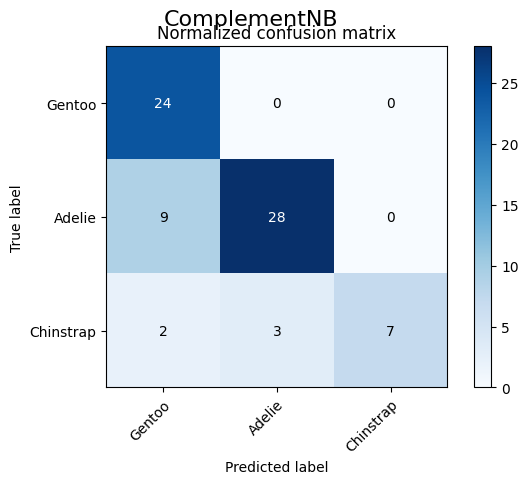

In [128]:
import numpy as np
# Creamos este array porque es el parámetro con las clases que espera la función
clases_penguins = np.array(['Gentoo', 'Adelie', 'Chinstrap'])
plot_confusion_matrix(ytest_df['species'], y_model_array, classes=clases_penguins, normalize=False, title='Normalized confusion matrix', titleSup='ComplementNB')

In [129]:
# separamos datos de entrada y salida
X_penguins = penguins.drop('species', axis=1)
y_penguins = penguins['species']
# separamos train y test
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_penguins, y_penguins, test_size=0.21, random_state=1)

In [130]:
# 1. elegimos clasificador
from sklearn.naive_bayes import BernoulliNB
# 2. instanciamos el modelo
model = BernoulliNB()
# 3. Entrenamiento con los datos
model.fit(Xtrain, ytrain)

BernoulliNB()

In [131]:
# 4. Predicción con nuevos datos
y_model = model.predict(Xtest)
y_model

array(['Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo'], dtype='<U9')

In [132]:
# 5 evaluación
# Compara si los resultados obtenidos por el modelo (y_model) coinciden con los datos y_test esperados
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model) # Precisión del modelo

0.5205479452054794

In [133]:
# Y finalmente visualizamos la Matriz de Confusión, para lo que se crea la siguiente función, que se llamará más adelante

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt

# y_true : dataframe -> Los valores de las clases que son ciertos (test)
# y_pred : ndarray   -> Los valores calculados de las clases después de realizar la predicción
# class  : ndarray   -> Los nombres de las clases/valores objetivos

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          titleSup=None):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    fig.suptitle(titleSup, fontsize=16, y=1, ha='center')
    return ax

In [ ]:
# Transformamos variables categóricas a valores numéricos/enteros para llamar a la función que pinta la matriz de confusión plot_confusion_matrix()
ytest_df= ytest.to_frame()
ytest_df['species'].replace(['Gentoo', 'Adelie', 'Chinstrap'],[0, 1, 2], inplace=True)
ytest_df

In [136]:
# Transformamos variables categóricas a array para poder llamar a la función que pinta la matriz de confusión plot_confusion_matrix()
import pandas as pd
# Transformamos el resultado de la predicción(array) a un dataframe para transformar los valores categóricos en numéricos
y_model_df= pd.DataFrame(y_model, columns = ['species'])
y_model_df['species'].replace(['Gentoo', 'Adelie', 'Chinstrap'],[0, 1, 2], inplace=True)
# Y volvemos a transformar el dataframe a un array, que es el tipo de dato que espera la función plot_confusion_matrix()
y_model_array = y_model_df['species'].to_numpy()
y_model_array

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

Confusion matrix, without normalization
[[24  0  0]
 [23 14  0]
 [12  0  0]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

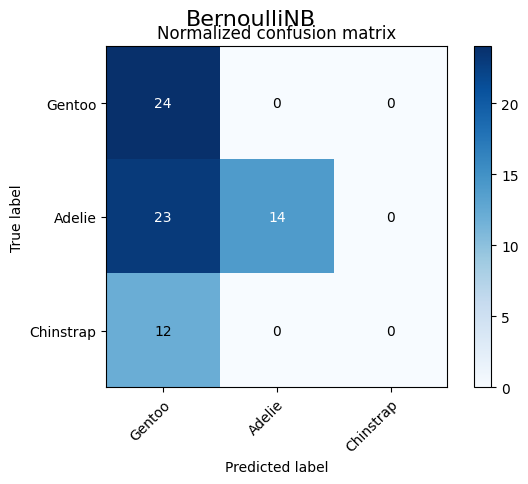

In [137]:
import numpy as np
# Creamos este array porque es el parámetro con las clases que espera la función
clases_penguins = np.array(['Gentoo', 'Adelie', 'Chinstrap'])
plot_confusion_matrix(ytest_df['species'], y_model_array, classes=clases_penguins, normalize=False, title='Normalized confusion matrix', titleSup='BernoulliNB')